In [ ]:
'''
아나콘다 콘솔에서 파이썬 가상환경 3.10으로 만들고 적용하는 방법
참고자료 : https://han-py.tistory.com/340
'''
# 콘다에 존재하는 env확인하기
# !conda env list
# 생성하기
# !conda create -n python3_10 python=3.10
# 실행하기
# !conda activate python3_10
# 주피터노트북 추가하기
# !conda install jupyter jupyterlab
# !python -m pip install ipykernel
# !python -m ipykernel install --user --name="python3_10"
# 종료하기
#!conda deactivate


'''
vscode 등에서 아래의 cmd 적용
'''
#python3.10 -m venv .venv
#source .venv/bin/activate

- Data load

In [3]:
!python --version

Python 3.10.14


In [ ]:
!pip install -r requirements.txt

In [ ]:
'''
캐글 데이터 다운로드하는 쉬운 코드

캐글 데이터셋의 api 커맨드는 아래와 같습니다.
실행하시면 zip파일이 다운로드 됩니다.
'''
!kaggle datasets download -d joebeachcapital/30000-spotify-songs
!kaggle datasets download -d geomack/spotifyclassification

In [47]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools
import zipfile
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

In [14]:
def unzip():
    # 현재 작업 디렉토리 경로를 가져옴
    current_dir = os.getcwd()

    # 현재 디렉토리 내의 모든 파일을 검색
    for file_name in os.listdir(current_dir):
        # 확장자가 .zip인 파일만 처리
        if file_name.endswith('.zip'):
            # 파일 경로 생성
            zip_file_path = os.path.join(current_dir, file_name)

            # 압축 해제할 디렉토리 경로 (파일 이름으로 폴더 생성)
            extract_to_dir = os.path.join(current_dir, file_name[:-4])

            # 출력 디렉토리가 없는 경우 생성
            os.makedirs(extract_to_dir, exist_ok=True)

            # zip 파일을 열고 압축 해제
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                zip_ref.extractall(extract_to_dir)

            print(f"'{zip_file_path}'가 '{extract_to_dir}'로 압축 해제되었습니다.")

In [15]:
unzip()

'c:\Users\Public\Downloads\Fastcampus\mlops\project\30000-spotify-songs.zip'가 'c:\Users\Public\Downloads\Fastcampus\mlops\project\30000-spotify-songs'로 압축 해제되었습니다.
'c:\Users\Public\Downloads\Fastcampus\mlops\project\spotifyclassification.zip'가 'c:\Users\Public\Downloads\Fastcampus\mlops\project\spotifyclassification'로 압축 해제되었습니다.


In [17]:
df1 = pd.read_csv('30000-spotify-songs\spotify_songs.csv')
df1.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [18]:
df2 = pd.read_csv('spotifyclassification\data.csv')
df2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


- Data show(EDA)

In [21]:
data1 = df1.copy()

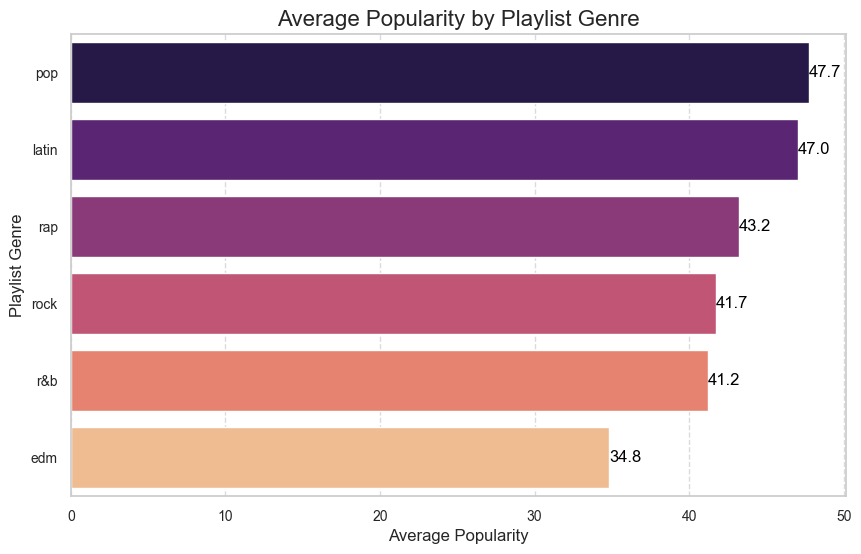

In [22]:
# Average popularity by playlist genre, sorted in descending order
playlist_popularity = data1.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(10, 6))
sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index, palette='magma')

# Adding data labels
for index, value in enumerate(playlist_popularity.values):
    plt.text(value, index, f'{value:.1f}', va='center', ha='left', color='black')

# Enhancing readability
plt.title('Average Popularity by Playlist Genre', fontsize=16)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Playlist Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

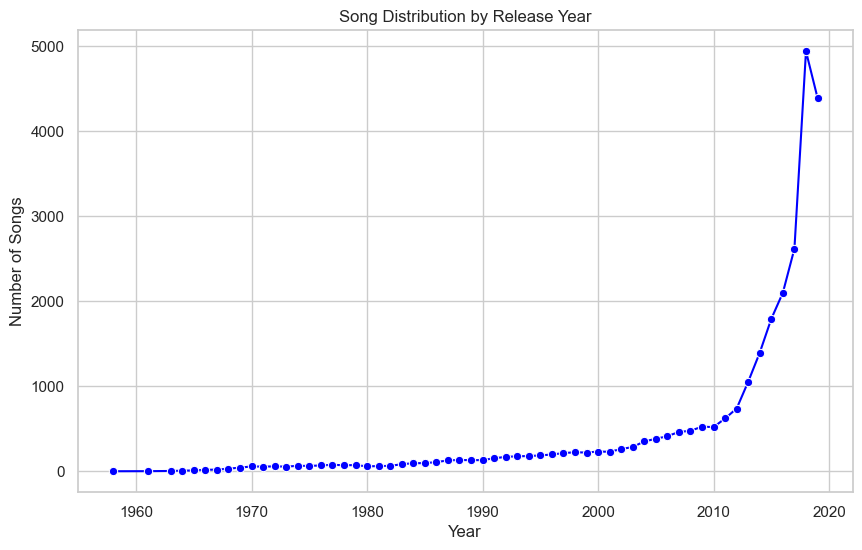

In [24]:
# Assuming your DataFrame is named df and has a 'track_album_release_date' column
data1['year'] = pd.to_datetime(data1['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = data1['year'].value_counts().sort_index()

# Now, proceed with the rest of your code:
# Removing the most recent year if it's incomplete
yearly_tracks = yearly_tracks[yearly_tracks.index < 2023]  # Adjust the year based on your dataset

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

plt.show()

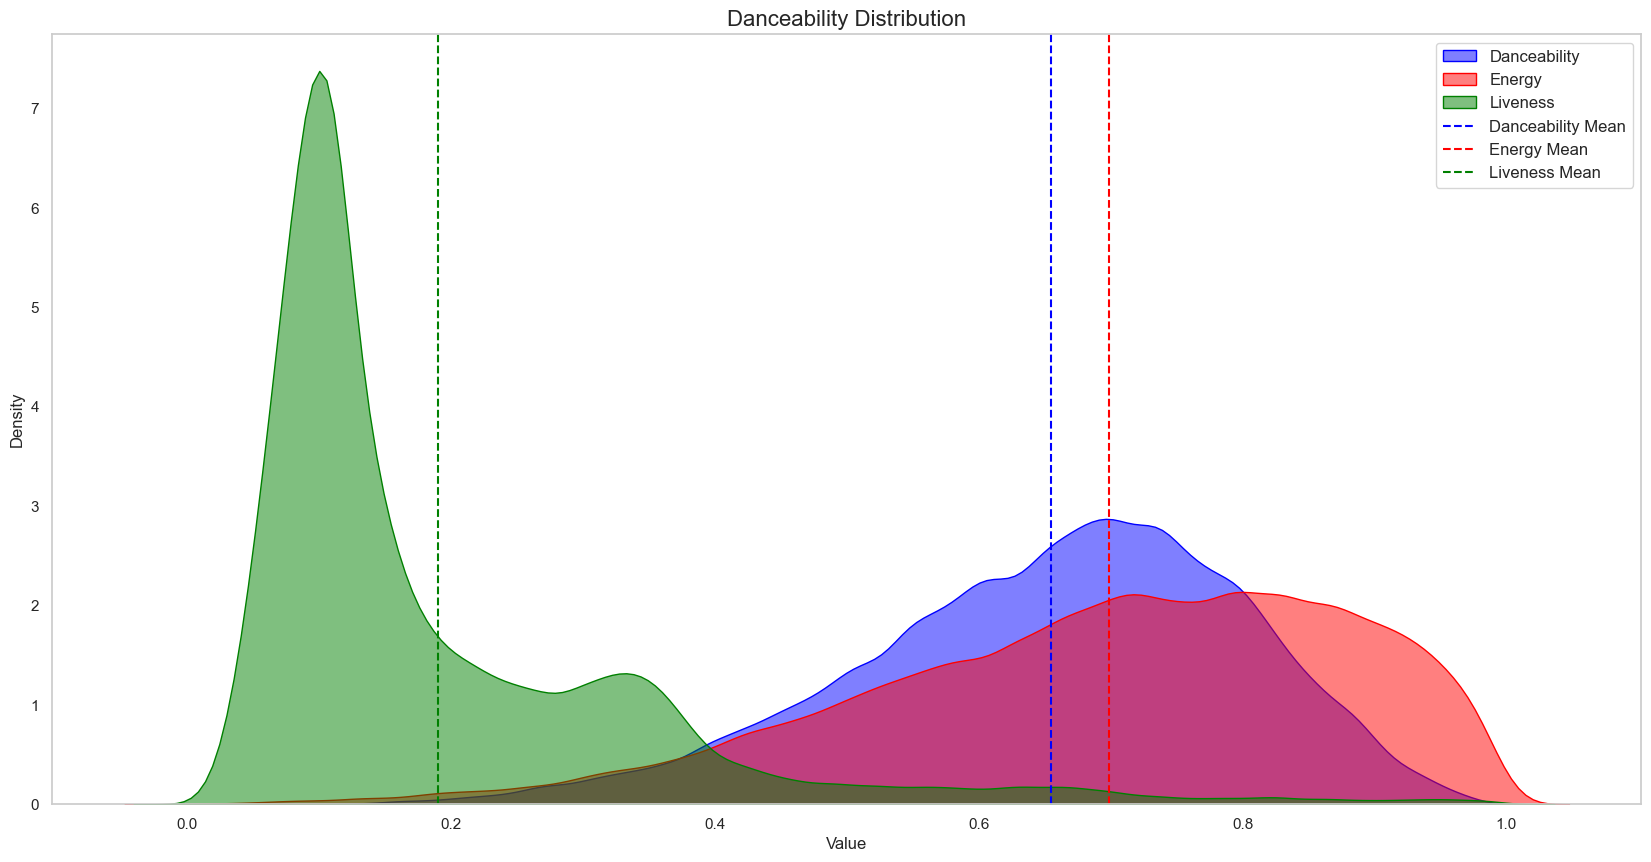

In [30]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(data1['danceability'], shade=True, label='Danceability', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(data1['energy'], shade=True, label='Energy', color='red', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(data1['liveness'], shade=True, label='Liveness', color='green', alpha=0.5, bw_adjust=0.7)

plt.axvline(data1['danceability'].mean(), color='blue', linestyle='--', label='Danceability Mean')
plt.axvline(data1['energy'].mean(), color='red', linestyle='--', label='Energy Mean')
plt.axvline(data1['liveness'].mean(), color='green', linestyle='--', label='Liveness Mean')

plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

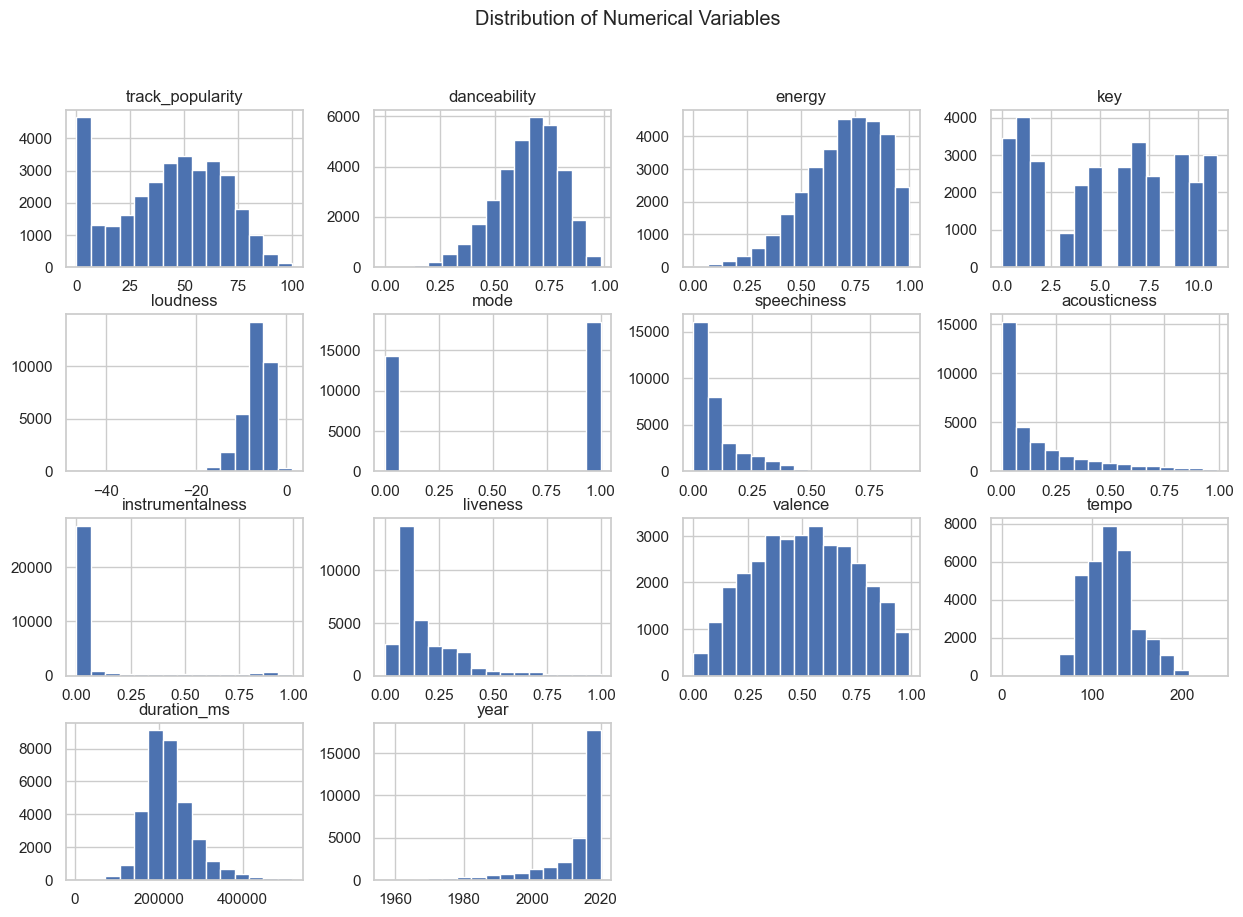

In [32]:
numerical_columns = data1.select_dtypes(include=['int64', 'float64']).columns

data1[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

- Data preprocessing(default)

In [43]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = data1[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

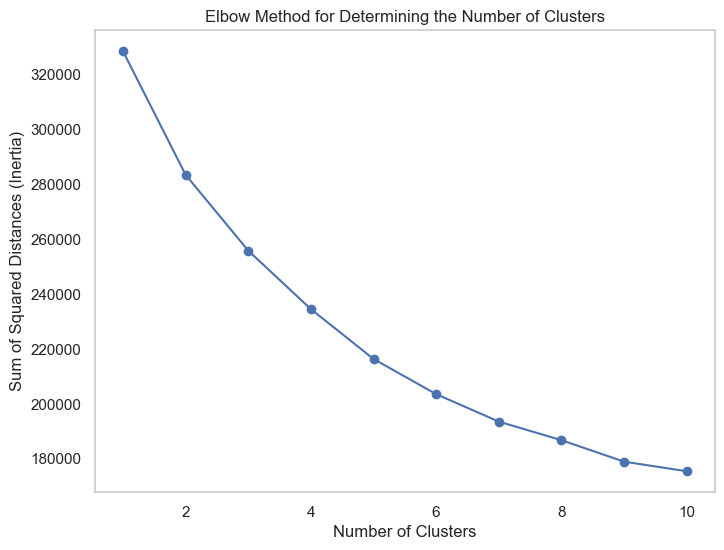

In [44]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.grid(False)
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)
data1['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

In [46]:
# Viewing total cluster
data1['cluster_kmeans'].value_counts()

cluster_kmeans
0    13970
2    10837
1     5418
3     2608
Name: count, dtype: int64

In [48]:
pca = PCA(n_components=2)

# Apply PCA on the scaled feature set X_scaled and transform the data into the new 2-dimensional space.
X_pca = pca.fit_transform(X_scaled)

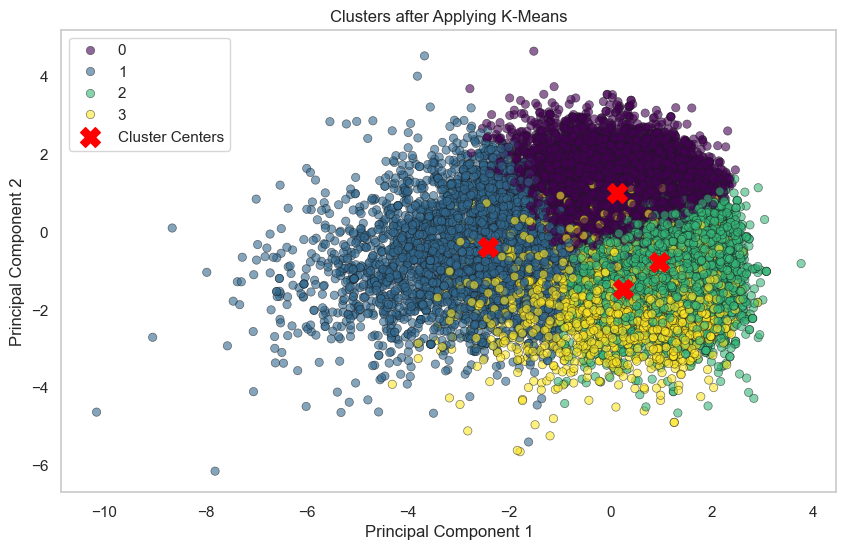

In [49]:
# Apply K-Means clustering
clusters = kmeans.fit_predict(X_scaled)
data1['cluster_kmeans'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], 
                y=X_pca[:, 1], 
                hue=data1['cluster_kmeans'], 
                palette='viridis', 
                alpha=0.6, 
                edgecolor='k')

# Adding the cluster centers
centers = kmeans.cluster_centers_
# Projecting the centers to the 2D PCA space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='red', 
            s=200, 
            marker='X', 
            label='Cluster Centers')

plt.title('Clusters after Applying K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

In [51]:
# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_1_features = data1[data1['cluster_kmeans'] == 0][features].mean()
print("Mean of Features for Cluster 0:")
print(cluster_1_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_2_features = data1[data1['cluster_kmeans'] == 1][features].mean()
print("Mean of Features for Cluster 1:")
print(cluster_2_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_3_features = data1[data1['cluster_kmeans'] == 2][features].mean()
print("Mean of Features for Cluster 2:")
print(cluster_3_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_4_features = data1[data1['cluster_kmeans'] == 3][features].mean()
print("Mean of Features for Cluster 3:")
print(cluster_4_features)
print()

Mean of Features for Cluster 0:
danceability             0.749967
energy                   0.705715
loudness                -6.356785
speechiness              0.135034
acousticness             0.149064
instrumentalness         0.011371
liveness                 0.163004
valence                  0.650860
tempo                  114.067444
duration_ms         220058.703651
dtype: float64

Mean of Features for Cluster 1:
danceability             0.609132
energy                   0.436545
loudness               -10.374419
speechiness              0.091388
acousticness             0.497412
instrumentalness         0.084702
liveness                 0.158093
valence                  0.399183
tempo                  112.972669
duration_ms         226330.339978
dtype: float64

Mean of Features for Cluster 2:
danceability             0.553642
energy                   0.799628
loudness                -5.305196
speechiness              0.087260
acousticness             0.072985
instrumentalness      

In [52]:
def recommend_songs_by_cluster_kmeans(song_name, data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    selected_song = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    
    # If the song is not found, display a message and exit the function
    if selected_song.empty:
        print("Song not found.")
        return None
    
    # Retrieve the cluster to which the selected song belongs
    cluster = selected_song['cluster_kmeans'].values[0]
    
    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster_kmeans'] == cluster]
    
    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]
    
    # Return only the 'track_name' and 'track_artist' columns, limited to the top 25 recommendations
    return recommended_songs[['track_name', 'track_artist']].head(30)

In [53]:
song_name = "Christmas"  
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, data1)

# If recommendations are found, print them
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                           track_name      track_artist
2                     All the Time - Don Diablo Remix      Zara Larsson
3                   Call You Mine - Keanu Silva Remix  The Chainsmokers
6                     Never Really Over - R3HAB Remix        Katy Perry
7            Post Malone (feat. RANI) - GATTÜSO Remix         Sam Feldt
8              Tough Love - Tiësto Remix / Radio Edit            Avicii
9                 If I Can't Have You - Gryffin Remix      Shawn Mendes
11                              Hate Me - R3HAB Remix    Ellie Goulding
13     SOS - Laidback Luke Tribute Remix / Radio Edit            Avicii
14  Summer Days (feat. Macklemore & Patrick Stump ...     Martin Garrix
16                 All My Friends - Eden Prince Remix       AJ Mitchell
19                         Let It Be Me - Sondr Remix        Steve Aoki
20               Heaven - David Guetta & MORTEN Remix            Avicii
22  Don't Leave Me Alone (feat. Anne-Marie) - 

> Model Algorithm Introduction

> What is an Interaction Matrix?

An **interaction matrix** is a core concept in recommendation systems, particularly those based on **Collaborative Filtering**. It is a table (or matrix) that captures the relationships between two sets of entities, such as users and items (e.g., songs, movies, products), in a format that can be processed by recommendation algorithms.

An **interaction matrix** is a matrix where:

- **Rows** represent one set of entities, typically users.
- **Columns** represent another set of entities, typically items (such as songs, movies, or products).
- **Entries** in the matrix indicate the interaction between a user and an item.

These interactions can be:

- **Explicit:** Where users provide direct feedback, such as ratings for a movie (e.g., 1 to 5 stars).
- **Implicit:** Where the interaction is inferred from user behavior, such as the number of times a song was played, whether a product was purchased, or if an item was viewed.

> Example

Consider an example of an interaction matrix for a music recommendation system:

| User \ Track | Track 1 | Track 2 | Track 3 | Track 4 |
|--------------|---------|---------|---------|---------|
| User 1       | 5       | 0       | 3       | 0       |
| User 2       | 0       | 2       | 0       | 4       |
| User 3       | 1       | 0       | 5       | 3       |

Here:

- `User 1` rated `Track 1` with a 5, `Track 3` with a 3, and did not rate `Tracks 2` or `4`.
- `User 2` rated `Track 2` with a 2, and `Track 4` with a 4, and did not rate `Tracks 1` or `3`.
- `User 3` rated `Track 1` with a 1, `Track 3` with a 5, and `Track 4` with a 3, and did not rate `Track 2`.

> Usage

- **Recommendation:** The interaction matrix is used by recommendation algorithms to predict which items (songs, movies, etc.) a user might like based on the interactions of other users with similar items.

- **Collaborative Filtering:** This type of recommendation system uses the interaction matrix to identify patterns and similarities between users (User-based Collaborative Filtering) or between items (Item-based Collaborative Filtering).

> Construction of the Matrix

To construct an interaction matrix in Python, you can use the `pivot` function from pandas, as shown below:

> Conclusion

An interaction matrix is a foundational component of many recommendation systems, as it summarizes the relationships between users and items in a structure that can be easily analyzed to generate personalized recommendations.

> Collaborative Filtering

Collaborative Filtering is a popular technique for recommendation systems that relies on the behavior and preferences of multiple users to make personalized recommendations.

> Steps to Implement Collaborative Filtering

1. **Data Preparation:**
   - **User-Item Matrix Creation:** Construct a matrix where rows represent users and columns represent items (songs in this case). The value in each cell represents the interaction between a user and a song, such as a rating or the number of times the song was played.
   - **Handling Missing Values:** If a user has not interacted with a song, the corresponding cell can be treated as zero or left as missing.

2. **Choose the Algorithm:**
   - **User-Based Collaborative Filtering:**
     - **Objective:** Recommend songs that similar users liked.
   - **Item-Based Collaborative Filtering:**
     - **Objective:** Recommend songs similar to the ones a user has already liked.
   - **Matrix Factorization:** Techniques like Singular Value Decomposition (SVD) can be used to reduce the dimensionality of the matrix and capture latent structures in user-item interactions.

> Explanation:
- **KNN:** K-Nearest Neighbors is used here to find similar users or items based on the cosine similarity metric.
- **User-Based Filtering:** You can change the focus to item-based filtering by switching the perspective from users to items in the matrix.
- **Dimensionality Reduction:** Advanced techniques like SVD can further enhance the model by capturing latent factors in the data.